<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Jishan Desai<br>
<b>NetID</b>:jpd222<br>
<b>Recitation</b>:02<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:JD     
    

<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Fall 2019

# Lab 5: Image Processing

### Due Date : Thursday, October 17th 2019 by 11:59 PM.###


### About the Lab
Any given image can be considered as a matrix of pixels where each pixel contains (R,G,B) values between 0-255. Each color is represented as an unsigned 8-bit integer. In this lab, we will learn how to read an image into an ndarray or data frame and manipulate that Frame to do some interesting operations on the image. We will also learn how to do low rank estimations using Singular Value Decomposition. You will learn how to find a low rank estimations for a given image and use concepts such as Singular Value Decomposition and/or Principal Component Analysis (PCA) to understand more about the image structure.


## Part 1 - Pre-processing of an image  (15 points)
In this part of the lab, we learn how to read an image into a ndarray and manipulate them using various techniques. So let's get started. First to make things simpler, we will initialize the two test images that you can test the code with. As a starter, you are provided with the images, guna-2014.jpg and robot.jpg, but you are encouraged to test the code with many different jpg images.

IMPORTANT: The row and column dimensions of the two images must be the same. If not, you can use paint or other tools to rescale your test images.

In [1]:
# This will help test the code with different test images
image1 = 'data/guna_2014.jpg'
image2 = 'data/robot_2.jpg'

### Task 1.1  Reading the image
In this first task, we would like you to read any jpg image into an ndarray using matplotlib.image.imread. Using matplotlib.pyplot.plt.imshow, you should be able to show the image on your notebook. Also print the dimensions of the image and type of the image in the notebook as shown. Please use your own image and other images for testing this. We will use many random images to see if your algorithm is correct. Both images must be the same dimensions.

<class 'numpy.ndarray'>
(300, 200, 3)


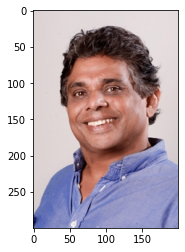

In [2]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(image1)
implot = plt.imshow(img.astype('uint8'))
print(type(img))
print(img.shape)
### END SOLUTION

### Task 1.2 Splitting the image into Red, Green and Blue portions.
The shape and type of the image should indicate that it is a 3D ndarray (row,col,color). The color is an array (R,G,B) where each color is represented by 1 byte (unsigned with range 0-225). In order to perform matrix operatins, we need to split the image into Red, Green and Blue components. Note that you still need to keep the image as a 3D array to plot. But you can make two of the component zero when plotting a specific color. Write the code to split the image into R, G and B and show the images as shown below.

#### Red image

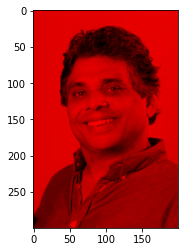

In [3]:
## TASK 1.2.1 Display the image using only the RED pixel values
## BEGIN SOLUTION
ImgDimension = img.shape
newImg1 = np.zeros(ImgDimension,int)
for i in range(ImgDimension[0]):
    for j in range(ImgDimension[1]):
        newImg1[i][j][0]=img[i][j][0]
imgplot = plt.imshow(newImg1)
## END SOLUTION

#### Green image

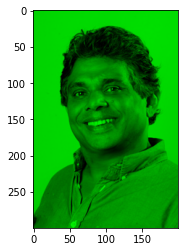

In [4]:
## TASK 1.2.2 Display the image using only the GREEN pixel values
## BEGIN SOLUTION
GreenImgDimension = img.shape
GreenGuna = np.zeros(ImgDimension,int)
for i in range(GreenImgDimension[0]):
    for j in range(GreenImgDimension[1]):
        GreenGuna[i][j][1]= img[i][j][1]
imgplot = plt.imshow(GreenGuna)

## END SOLUTION

#### Blue image

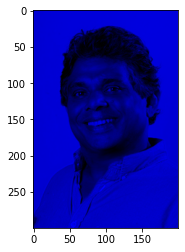

In [5]:
## TASK 1.2.3 Display the image using only the BLUE pixel values
## BEGIN SOLUTION
BlueImgDimension = img.shape
BlueGuna = np.zeros(BlueImgDimension,int)
for i in range(BlueImgDimension[0]):
    for j in range(BlueImgDimension[1]):
        BlueGuna[i][j][2]= img[i][j][2]
imgplot = plt.imshow(BlueGuna)

## END SOLUTION

## Part 2 - Transforming images  (15 points)
In this part, we will use linear combinations of two images to transform one image to another. Given two images A and B, define a linear combination of the images as : p.A + (1-p).B  where p is a value (think of p as a probability) between 0 and 1. For example, if p = 0, then we only show image B, and if p=1, then we only show image A. For all other values of p, the two images are transposed on each other. When p is closer to 0, you will mostly notice image B, and if p is closer to 1, you will mostly notice image A. When p is in the middle, the intensity of the pixles will be equally divided between the two images.
In this case, define the matrix p A as, each entry of A is multiplied (or scaled by) p

### Task 2.1
First we will learn how to scale an image by some value p that is between 0 and 1. Write the code to form the matrix p.A for any p, and plot the image. Start with p=0.5 and change it to see how the intensity of the image changes.

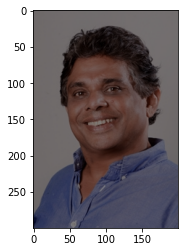

In [6]:
## BEGIN SOLUTION
import numpy as np
p =0.5
scaledGunaImg = np.zeros(ImgDimension,int)
for i in range(ImgDimension[0]):
    for j in range(ImgDimension[1]):
        for k in range(ImgDimension[2]):
         scaledGunaImg[i][j][k]= img[i][j][k]*p
newimgplot = plt.imshow(scaledGunaImg)
   

## END SOLUTION

### Task 2.2 Reading the second image and scaling
Use image2 to form the matrix (1-p).B for any p, and plot. Start with p=0.5 and change it (increase/decrease) between 0 and 1 to see how the intensity of the image changes. What if p > 1 or p < 0 ? How will you interpret it?  Also show the type of array and dimensions to make sure both images have the same dimensions (in order to superimpose of them properly)

<class 'numpy.ndarray'>
(300, 200, 3)


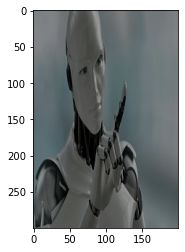

In [7]:
## BEGIN SOLUTION
p = 0.6 #making p >1, makes the image pixels brighter, while making this p<0 will make image pixels dimmer
roboImg = mpimg.imread(image2)
roboImgSize = roboImg.shape
newRoboDim = np.zeros(roboImgSize,int)
for i in range(roboImgSize[0]):
    for j in range(roboImgSize[1]):
        for k in range(roboImgSize[2]):
         newRoboDim[i][j][k]= roboImg[i][j][k]*p

print(type(newRoboDim))
print(newRoboDim.shape)
newimgplot = plt.imshow(newRoboDim)

## END SOLUTION

### Task 2.3 overlay images on each other. 
Overlay the two images and plot the combined image again. The matrix addition can help here.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


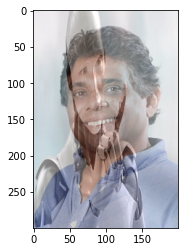

In [8]:
## BEGIN SOLUTION
combinedImage = np.zeros(roboImgSize,int)
combinedImage = newRoboDim + scaledGunaImg
mgplot = plt.imshow(combinedImage)

## END SOLUTION

### Task 2.4 Interactive panel design
Now we will use a widget to create an interactive panel that will allow you to experiment with the superimposed images.

In [9]:
# Initialize the widget
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### Define a function f 
The function f, takes alpha (which we called p before) and allow you to experiment with how the superimposed images changes as alpha changes. You will be able to drag the value between 0 and 1 to see how things change. With alpha = 0, you will get only one image, and with alpha = 1, you will get only the other image. The values of alpha between 0 and 1 will produce an image with varying domination by one image. Alpha = 0.5 is the equilibrium point, where each image is weighed equally.

In [10]:
##  BEGIN SOLUTION
def f(alpha):
    result = np.add(alpha*scaledGunaImg,(1-alpha)*newRoboDim);
    plt.imshow(result.astype('uint8'))
##  END SOLUTION
    
interact(f, alpha=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

## Part 3 - Application of Singular Value Decomposition  (15 points)
Singular value decomposition or SVD allows us to approximate the image using fewer bits of information about the structure of the image matrix. A readings on this method can be found from an excerpt of the linear algebra book by Jain and Gunawardena. (to be posted soon)

The singular value decomposition allows us to approximate a matrix using its decomposition into three matrices A = U S V^T
where U and V are orthogonal matrices and S is a diagonal matrix with singular values (V^T indicates the transpose of matrix V). The singular values are the eigen values of the matrix A A^T.

### Task 3.1 Representation of matrices as 2D
Prior to applying SVD to our image matrix, we need to transform the individual 3D matrices into 2D matrices. Basically, we can view any color component as color densities of one color and ignore the color dimension when we are transforming from 3D to 2D.

In [11]:
# transform the RED, GREEN, BLUE matrices into a 2D matrices of red, green, blue color density
# BEGIN SOLUTION
# create three 2D matrices (int type) each for colors, R, G, B. Be sure to match the 
# dimensions of the image matrix
dimensions = img.shape

R = np.zeros((dimensions[0], dimensions[1]), int)
G = np.zeros((dimensions[0], dimensions[1]), int)
B = np.zeros((dimensions[0], dimensions[1]), int)

R1 = img[:, :, 0]

for i in range(dimensions[0]):
    R[i, :] = img[i, :, 0]
    G[i, :] = img[i, :, 1]
    B[i, :] = img[i, :, 2]
    
print(R, G, B)


[[223 222 222 ... 231 229 229]
 [220 220 221 ... 229 227 227]
 [219 219 220 ... 229 229 229]
 ...
 [ 31  46  94 ... 142 148 137]
 [ 33  64  97 ... 140 142 131]
 [ 45  90  98 ... 139 129 125]] [[214 213 213 ... 222 223 223]
 [211 211 212 ... 220 221 221]
 [210 210 209 ... 220 220 220]
 ...
 [ 37  55 105 ... 148 151 140]
 [ 42  74 108 ... 146 148 137]
 [ 55 102 109 ... 145 134 130]] [[215 214 214 ... 223 223 223]
 [212 212 213 ... 221 221 221]
 [211 211 213 ... 221 221 221]
 ...
 [ 95 114 167 ... 200 202 191]
 [101 135 170 ... 198 200 189]
 [116 162 173 ... 195 189 185]]


### Task 3.1 Finding Singular values and Orthogonal matrices
Find the singular value decomposition of matrices R, G, B. List the singular values (S) and the orthogonal matrices (U, V) for colors R,G,B as (UR,sR, VhR), (UG,sG, VhG), (UB,sB, VhB).  

In [12]:
# BEGIN SOLUTION
from scipy import linalg
UR, sR, VhR = linalg.svd(R)
UG, sG, VhG =linalg.svd(G)
UB, sB, VhB = linalg.svd(B)
# END SOLUTION
print(sR, sG, sB)

[4.22972192e+04 6.71175531e+03 5.28368317e+03 3.44412391e+03
 3.00938674e+03 2.71181498e+03 2.05470961e+03 1.66349787e+03
 1.54910169e+03 1.39051872e+03 1.24894943e+03 1.08604280e+03
 1.04396400e+03 9.85246543e+02 9.28890325e+02 8.84174839e+02
 8.56392124e+02 7.85555444e+02 7.72333040e+02 7.34922529e+02
 7.01521772e+02 6.61330843e+02 6.27710223e+02 6.21664748e+02
 5.86594955e+02 5.50169487e+02 5.45563751e+02 5.26987214e+02
 5.09199173e+02 4.92431290e+02 4.76779536e+02 4.58711563e+02
 4.44963499e+02 4.37079176e+02 4.09270581e+02 4.02412507e+02
 3.88177655e+02 3.84915388e+02 3.69190663e+02 3.65291106e+02
 3.45406302e+02 3.36841709e+02 3.32140921e+02 3.21815375e+02
 3.09949135e+02 3.07535690e+02 3.00597512e+02 2.96512120e+02
 2.83284412e+02 2.76013616e+02 2.73490409e+02 2.61485049e+02
 2.55397068e+02 2.52798919e+02 2.49577187e+02 2.46207214e+02
 2.41013003e+02 2.35132381e+02 2.24388868e+02 2.22105555e+02
 2.18866946e+02 2.16026675e+02 2.08542782e+02 2.04583038e+02
 2.01555514e+02 2.005102

### Task 3.2 Finding a rank-1 approximation
A rank 1 approximation (starting with the highest eigenvalue lambda_1) 
can be done using $\lambda_{1}*u_1*v_1^T$ where $u_1$ and $v_1$ are column vectors. These column vectors are the first columns of the orthogonal matrices U and V, that are part of the SVD. We note that the multiplication of a column vector by a row vector in fact produces an approximated matrix.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


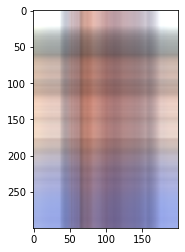

In [13]:
## Find the rank-1 approximation and show the image generated by it.
## BEGIN SOLUTION
rank1_appro_R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1_appro_G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1_appro_B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]

rank1_appro = np.zeros(dimensions, int)

for i in range(dimensions[0]):
    rank1_appro[i, : ,0] = rank1_appro_R[i, :]
    rank1_appro[i, : ,1] = rank1_appro_G[i, :] 
    rank1_appro[i, : ,2] = rank1_appro_B[i, :] 
    
plt.imshow(rank1_appro)
## END SOLUTION

### Task 3.2 Finding a rank-2 approximation
A rank 2 approximation add another term to the rank_1 approximation as follows. If the second largest eigen value is lambda_2, then we have the approximation as  $\lambda_{1}*u_1*v_1^T + \lambda_{2}*u_2*v_2^T$ where $u_1, u_2$ and $v_1, v_2$ are column vectors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


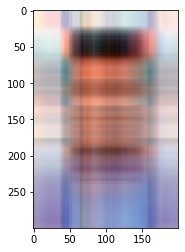

In [14]:
## Find the rank-2 approximation and show the image generated by it.
## BEGIN SOLUTION
rank1_appro_R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1_appro_G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1_appro_B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]


rank2_appro_R = UR[:, 1].reshape(len(UR[:, 0]), 1) * sR[1] * VhR[1, :]
rank2_appro_G = UG[:, 1].reshape(len(UG[:, 0]), 1) * sG[1] * VhG[1, :]
rank2_appro_B = UB[:, 1].reshape(len(UB[:, 0]), 1) * sB[1] * VhB[1, :]

rank2_appro = np.zeros(dimensions, int)

for i in range(dimensions[0]):
    rank2_appro[i, : ,0] = rank1_appro_R[i, :] + rank2_appro_R[i, :]
    rank2_appro[i, : ,1] = rank1_appro_G[i, :] + rank2_appro_G[i, :]
    rank2_appro[i, : ,2] = rank1_appro_B[i, :] + rank2_appro_B[i, :]
    
plt.imshow(rank2_appro)


## END SOLUTION

### Task 3.2 Finding a rank-k approximation
A rank k approximation is the sum of first k-terms of rank approximations. For example, if u[i] and v[i] are the i-th column vectors, and lambda_i is the i-th largest eigen value, then we have the approximation as 
$ \sum \lambda_{i}*u_i*v_i^T, i=1,2,...k$
Start with any k (including k=1 and k=2) to see if you get the same outcomes as above, and then changing it until you get a clearer image. You can play with k to see which one gives you a better approximation. The following is the image when k = 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


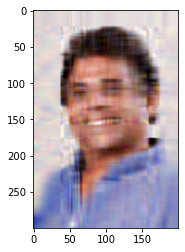

In [15]:
## Find the rank-k approximation and show the image generated by it.
## BEGIN SOLUTION
k = 10
betterGunaImg = np.zeros(dimensions,int)
for i in range(3):
    U, S, V = np.linalg.svd(img[:,:,i])
    rex = np.matrix(U[:,:k]) * np.diag(S[:k]) * np.matrix(V[:k,:])
    betterGunaImg[:,:,i] = rex
plt.imshow(betterGunaImg)
## END SOLUTION

## Part 3 - Open Ended Question  (points 5)
The SVD method we learned here can be viewed as a form of image compression. That is, instead of using all pixles of an m x n image matrix, we can use a few eigen vlaues and vectors to form an approximation to the original matrix. What would be a possible application of this idea? 
Hint: There can be many. So any reasonable answer is fine. Write the answer in the cell below. Be as creative as possible.

In [16]:
### BEGIN ANSWER


# The concept can widely be using in image compression. More intiatively, it can majorly be used for doing various Matrix operations
# such matrix inversion. Moreover, it can be used in various machine learning/Data science models because svd can effectively be used to 
# reduce the size of the data.As a result, making it more efficient to deal with data and images.So, in general, it useful on 
# everything where size reduction can increase the performace of the device/model or the program, and the reduction is to be performed
# on some sort of matrix[Usually input matrix] 


### END ANSWER

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) : 9
* how can we improve his lab? : In opinion, everything was alright and nothing needs to be changed.


<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab5.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab5 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

##### Lab developed by A.D. Gunawardena @ 2019